# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Tushar Jain<br>
Roll Number: 2019101091

### Dataset

Use the code below to load the Dataset

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [11]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

In [12]:
class KNN_classifier:
    def __init__(self, k):
        self.x = 0
        self.y = 0
        self.k = k
    
    def train(self, x_input, y_input):
        self.x = x_input
        self.y = y_input
        return
    
    def mode(self, input_in):
        # Finds the mode in an array
        input_in.sort()
        cur = input_in[0]
        cur_val = 1
        actual = input_in[0]
        actual_val = 1
        for i in range(1,len(input_in)):
            if(input_in[i]==cur):
                cur_val+=1
            else:
                if(cur_val>actual_val):
                    actual_val = cur_val
                    cur = actual
        if(cur_val>actual_val):
            actual_val = cur_val
            cur = actual
        return cur
            
    
    def point_pred(self, point_in):
        # Predicts the y for given input
        # Make all the (dist, class) pairs for the input point
        dist_class = []
        for num in range(0, len(self.x)):
            dist_class.append([ np.linalg.norm(point_in-self.x[num]), self.y[num] ])
        
        # Select the first "k" (dist, class) pairs sorted by dist
        dist_class = sorted(dist_class)[:self.k]

        # return the predicted class
        return self.mode([i[1] for i in dist_class])
    
    def accuracy(self, x_input, y_input):
        y_pred = [self.point_pred(i) for i in x_input]
        count = 0
        for num in range(0, len(y_pred)):
            if y_pred[num] == y_input[num]:
                count += 1
        return (count/len(y_input))*100

In [13]:
fin = []
for i in range(1, 10):
    model = KNN_classifier(i)
    model.train(X_train, y_train)
    fin.append(model.accuracy(X_test, y_test))

Text(0, 0.5, 'Accuracy')

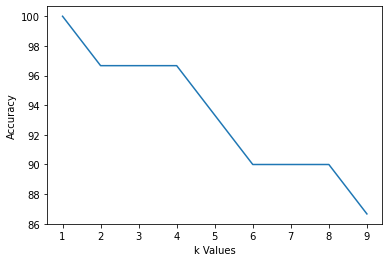

In [14]:
plot(range(1, 10), fin)
xlabel("k Values")
ylabel("Accuracy")

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?

**1) What are the Advantages and Disadvantages of KNN algorithm?<br>** 
**Advantages**
- Easy to Implement
- Easy to Explain
- No Training Time

**Disadvantages**
- Computationally expensive to use, as you have to find te distance with every point in the dataset
- It is sensitive to noisy and missing data
- Computationally more expensive with high dimensionality
- Have to refactor every dimension

**2) What is the complexity of the KNN algorithm during Training and Testing?**

**Training**

This is constant complexity, as you just need to store the data.

**Testing**

O(dn)
where d is the number of dimensions and n is the number of data points in the training set.

**3) Is euclidian distance the only distance metric used in KNN?**

No, Other metrics such as Manhattan Distance, Minkowski Distance, Mahalanobis Distance, Hamming Distance, and Cosine Distance can be used instead.

**4) what K value gave the best accuracy?**

A K = 1 gave the best accuracy in this case.